In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("training.csv")


In [3]:
test= pd.read_csv("test.csv")

In [4]:
train.dtypes

ID                 int64
Age                int64
Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours.Per.Week     int64
Native.Country    object
Income.Group      object
dtype: object

In [5]:
test.dtypes

ID                 int64
Age                int64
Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours.Per.Week     int64
Native.Country    object
dtype: object

In [6]:
train.describe()

,ID,Age,Hours.Per.Week
count,32561.000000,32561.000000,32561.000000
mean,16281.000000,38.581647,40.437456
std,9399.695394,13.640433,12.347429
min,1.000000,17.000000,1.000000
25%,8141.000000,28.000000,40.000000
50%,16281.000000,37.000000,40.000000
75%,24421.000000,48.000000,45.000000
max,32561.000000,90.000000,99.000000


In [7]:
categorical_variables = train.dtypes.loc[train.dtypes == 'object'].index

In [8]:
categorical_variables

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')

In [9]:
train[categorical_variables].apply(lambda x:len(x.unique()))

Workclass          9
Education         16
Marital.Status     7
Occupation        15
Relationship       6
Race               5
Sex                2
Native.Country    42
Income.Group       2
dtype: int64

In [10]:
train['Race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: Race, dtype: int64

In [11]:
train['Race'].value_counts()/train.shape[0]

White                 0.854274
Black                 0.095943
Asian-Pac-Islander    0.031909
Amer-Indian-Eskimo    0.009551
Other                 0.008323
Name: Race, dtype: float64

In [12]:
train['Native.Country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [13]:
train['Native.Country'].value_counts()/train.shape[0]

United-States                 0.895857
Mexico                        0.019748
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                     0.001044
Peru                     

In [14]:
#multivariate analysis
    #continuous-continuous --> scatter plot
    #categorical-categorical --> cross tabulation
    #continuous-categorical  -->  Box plot

In [15]:
ct = pd.crosstab(train['Sex'], train['Income.Group'],margins=True)

In [16]:
ct

Income.Group,<=50K,>50K,All
Sex,,,
Female,9592,1179,10771
Male,15128,6662,21790
All,24720,7841,32561


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

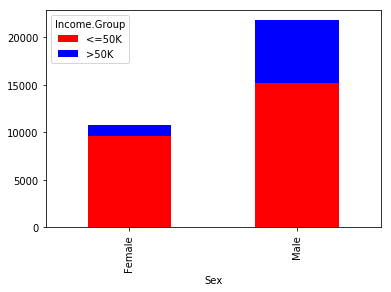

In [18]:
ct.iloc[:-1,:-1].plot(kind='bar',stacked=True,color=['red','blue'],grid=False)

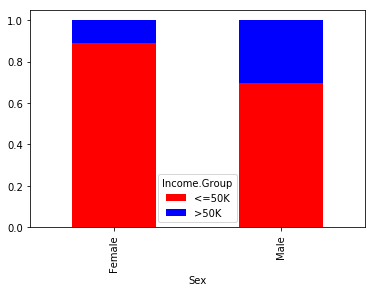

In [19]:
def convertToPercent(series):
        return series/float(series[-1])
    
ct2 = ct.apply(convertToPercent,axis=1)
ct2.iloc[:-1,:-1].plot(kind='bar',stacked=True,color=['red','blue'],grid=False)

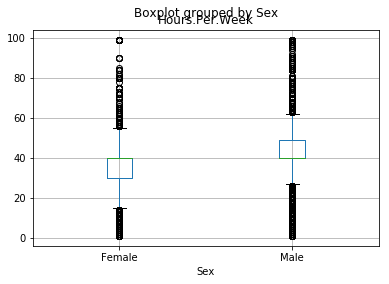

In [20]:
train.boxplot(column='Hours.Per.Week', by='Sex')

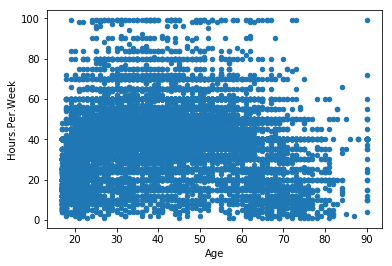

In [21]:
train.plot('Age','Hours.Per.Week',kind='scatter')

In [22]:
train.apply(lambda x:sum(x.isnull()))

ID                   0
Age                  0
Workclass         1836
Education            0
Marital.Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Hours.Per.Week       0
Native.Country     583
Income.Group         0
dtype: int64

In [23]:
#mode values
#imputation

from scipy.stats import mode

mode(train['Workclass'].astype(str)).mode[0]

C:\Users\HKC05\AppData\Local\Continuum\anaconda3a\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


'Private'

In [24]:
train['Workclass'].fillna(mode(train['Workclass'].astype(str)).mode[0])

0               State-gov
1        Self-emp-not-inc
2                 Private
3                 Private
4                 Private
5                 Private
6                 Private
7        Self-emp-not-inc
8                 Private
9                 Private
10                Private
11              State-gov
12                Private
13                Private
14                Private
15                Private
16       Self-emp-not-inc
17                Private
18                Private
19       Self-emp-not-inc
20                Private
21                Private
22            Federal-gov
23                Private
24                Private
25              Local-gov
26                Private
27                Private
28                Private
29                Private
               ...       
32531             Private
32532             Private
32533             Private
32534             Private
32535             Private
32536             Private
32537             Private
32538       

In [25]:
cols = ['Workclass','Occupation','Native.Country']
for c in cols:
        train[c].fillna(mode(train[c].astype(str)).mode[0],inplace=True)

In [26]:
cols

['Workclass', 'Occupation', 'Native.Country']

In [27]:
train[c]

0        United-States
1        United-States
2        United-States
3        United-States
4                 Cuba
5        United-States
6              Jamaica
7        United-States
8        United-States
9        United-States
10       United-States
11               India
12       United-States
13       United-States
14       United-States
15              Mexico
16       United-States
17       United-States
18       United-States
19       United-States
20       United-States
21       United-States
22       United-States
23       United-States
24       United-States
25       United-States
26       United-States
27               South
28       United-States
29       United-States
             ...      
32531    United-States
32532    United-States
32533            Japan
32534    United-States
32535    United-States
32536    United-States
32537    United-States
32538    United-States
32539    United-States
32540    United-States
32541    United-States
32542    United-States
32543    Un

In [28]:
test[c].fillna(mode(test[c].astype(str)).mode[0],inplace=True)

In [29]:
test[c]

0        United-States
1        United-States
2        United-States
3        United-States
4        United-States
5        United-States
6        United-States
7        United-States
8        United-States
9        United-States
10       United-States
11       United-States
12       United-States
13       United-States
14       United-States
15       United-States
16       United-States
17       United-States
18       United-States
19       United-States
20       United-States
21       United-States
22       United-States
23                Peru
24       United-States
25       United-States
26       United-States
27       United-States
28       United-States
29       United-States
             ...      
16251    United-States
16252    United-States
16253    United-States
16254    United-States
16255    United-States
16256    United-States
16257    United-States
16258    United-States
16259    United-States
16260    United-States
16261    United-States
16262    United-States
16263    Un

In [30]:
train.apply(lambda x:sum(x.isnull()))

ID                0
Age               0
Workclass         0
Education         0
Marital.Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours.Per.Week    0
Native.Country    0
Income.Group      0
dtype: int64

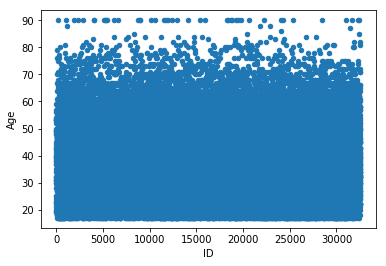

In [31]:
#outlier treatment
#numerical values
#scatter plot
train.plot('ID','Age',kind='scatter')


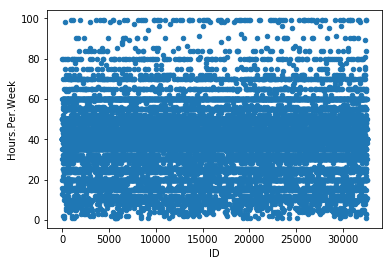

In [32]:
train.plot('ID','Hours.Per.Week',kind='scatter')

In [33]:
#Variable Transformation
train['Workclass'].value_counts()/train.shape[0]

Private             0.753417
Self-emp-not-inc    0.078038
Local-gov           0.064279
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: Workclass, dtype: float64

In [34]:
combine = ['State-gov','Self-emp-inc','Federal-gov','Without-pay','Never-worked']
for cat in combine:
        train['Workclass'].replace({cat: 'Others'},inplace=True)
        train['Workclass'].replace({cat: 'Others'},inplace=True)

In [35]:
train['Workclass'].value_counts()/train.shape[0]

Private             0.753417
Others              0.104266
Self-emp-not-inc    0.078038
Local-gov           0.064279
Name: Workclass, dtype: float64

In [36]:
categorical= list(train.dtypes.loc[train.dtypes=='object'].index)
categorical

['Workclass',
 'Education',
 'Marital.Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native.Country',
 'Income.Group']

In [37]:
categorical[1:]

['Education',
 'Marital.Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native.Country',
 'Income.Group']

In [38]:
train[categorical].apply(lambda x: len(x.unique()))

Workclass          4
Education         16
Marital.Status     7
Occupation        14
Relationship       6
Race               5
Sex                2
Native.Country    41
Income.Group       2
dtype: int64

In [39]:
for column in categorical:
    f= train[column].value_counts()/train.shape[0]
    f2=f.loc[f.values<0.05].index
    
    for c in f2:
        train[column].replace({c:'Others'}, inplace=True)
        test[column].replace({c: 'Others'}, inplace=True)
        

In [40]:
train[categorical].apply(lambda x: len(x.unique()))

Workclass         4
Education         5
Marital.Status    4
Occupation        8
Relationship      5
Race              3
Sex               2
Native.Country    2
Income.Group      2
dtype: int64

In [41]:
c=c[:-1]
c

'Holand-Netherland'

In [42]:
#Predictive modelling
#classification problem
#logistic regression,decision tree

from sklearn.preprocessing import LabelEncoder
c = train.dtypes.loc[train.dtypes=='object'].index
c

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')

In [43]:
c=c[:-1]
c

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country'],
      dtype='object')

In [44]:
from sklearn.preprocessing import LabelEncoder
c = train.dtypes.loc[train.dtypes=='object'].index
c

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')

In [45]:
train

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group
0,1,39,Others,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,2,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,3,38,Private,HS-grad,Divorced,Others,Not-in-family,White,Male,40,United-States,<=50K
3,4,53,Private,Others,Married-civ-spouse,Others,Husband,Black,Male,40,United-States,<=50K
4,5,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Others,Black,Female,40,Others,<=50K
5,6,37,Private,Masters,Married-civ-spouse,Exec-managerial,Others,White,Female,40,United-States,<=50K
6,7,49,Private,Others,Others,Other-service,Not-in-family,Black,Female,16,Others,<=50K
7,8,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K
8,9,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,>50K
9,10,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K


In [46]:
le = LabelEncoder()
for a in c:
    train[a] = le.fit_transform(train[a])
   # test[a]  = le.fit_transform(test[a])

In [47]:
train

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group
0,1,39,1,0,2,0,1,2,1,40,1,0
1,2,50,3,0,1,2,0,2,1,13,1,0
2,3,38,2,1,0,5,1,2,1,40,1,0
3,4,53,2,3,1,5,0,0,1,40,1,0
4,5,28,2,0,1,6,2,0,0,40,0,0
5,6,37,2,2,1,2,2,2,0,40,1,0
6,7,49,2,3,3,4,1,0,0,16,0,0
7,8,52,3,1,1,2,0,2,1,45,1,1
8,9,31,2,2,2,6,1,2,0,50,1,1
9,10,42,2,0,1,2,0,2,1,40,1,1


In [48]:
train.dtypes

ID                int64
Age               int64
Workclass         int32
Education         int32
Marital.Status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Hours.Per.Week    int64
Native.Country    int32
Income.Group      int32
dtype: object

In [49]:
dependent_v='Income.Group'
independent_v= [x for x in train.columns if x not in [dependent_v, 'ID']]
independent_v

['Age',
 'Workclass',
 'Education',
 'Marital.Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Hours.Per.Week',
 'Native.Country']

In [50]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, max_features='sqrt')
model.fit(train[independent_v],train[dependent_v])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
p_train = model.predict(train[independent_v])

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
acc_train = accuracy_score(train[dependent_v],p_train)
acc_train

0.8216270999047941

Linear Algebra
linearRegression
Logistic Regression
Decision Tree Algorithm
Naive Bayes
Support Vector Machine
K-means
Hierarchical Clustering
Random Forest

In [57]:
import pandas as pd

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
train= pd.read_csv("trainings.csv")

In [63]:
test = pd.read_csv("test.csv")

In [64]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [66]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [67]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [69]:
train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [70]:
train['Married'].value_counts() /train.shape[0]

Yes    0.648208
No     0.346906
Name: Married, dtype: float64

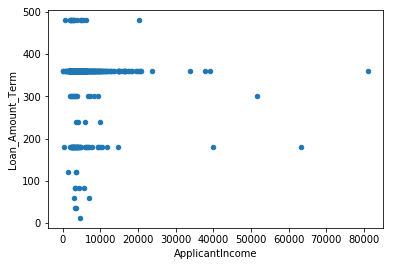

In [78]:
train.plot('ApplicantIncome','Loan_Amount_Term', kind='scatter')

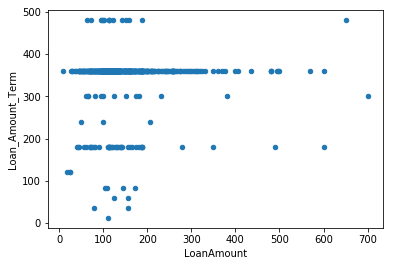

In [79]:
train.plot('LoanAmount','Loan_Amount_Term', kind='scatter')

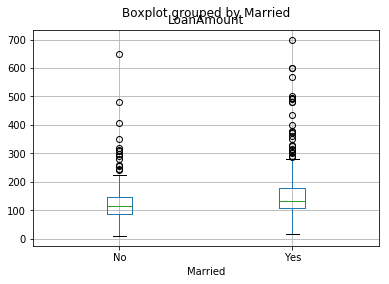

In [86]:
train.boxplot(column='LoanAmount',by='Married')

In [87]:
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [92]:
import scipy.stats as scs

In [88]:
groupsize = train.groupby(['Gender','Married']).size()
groupsize

Gender  Married
Female  No          80
        Yes         31
Male    No         130
        Yes        357
dtype: int64

In [89]:
csum  = groupsize.unstack('Gender')
csum

Gender,Female,Male
Married,,
No,80,130
Yes,31,357


In [93]:
chi = scs.chisquare(csum.fillna(0))
chi

Power_divergenceResult(statistic=array([ 21.63063063, 105.80903491]), pvalue=array([3.30530949e-06, 8.11945565e-25]))

In [94]:
train.apply(lambda x:sum(x.isnull()))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [95]:
cols = ['Gender','Married','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']
for c in cols:
        train[c].fillna(mode(train[c].astype(str)).mode[0],inplace=True)

C:\Users\HKC05\AppData\Local\Continuum\anaconda3a\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [96]:
cols

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [97]:
train.apply(lambda x:sum(x.isnull()))

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# missing values

1) deletion
-->list wise - delete entire row
 -->pair wise
--> missing data is completely at random

2) mean/median/mode imputation
 --> mean/median - generalised
  --> mean/median - similar case imputation
3) Prediction Model
4) KNN - nearest neighbour k- choose wisely


# Outlier Detection

 Types of Outlier --
 1) Univariate
 2) Multivariate
 
 Causes of Outlier --
 
 1) Data Entry
 2) Measurement Errors
 3) -1.5 IQR 1.5 IQR
 
 How to remove outlier --
 
 1) Delete Observation